In [2]:
import numpy as np
# import packages
import pandas as pd

In [3]:
# read in features
df_raw_features = pd.read_pickle('ebw_temp_features_h1.pkl')
df_hits_tracker = pd.read_pickle('ebw_hits_tracker_h1.pkl')

In [5]:
df_raw_features['first_spin_year'] = df_raw_features['first_spin_date'].dt.year

In [5]:
df_raw_features['hit_tag_year'] = df_raw_features['hit_tag_date'].dt.year

In [7]:
# do some digging around w.r.t weeks_from_hit
mask = (df_raw_features['weeks_since_hit'] > 0) & (df_raw_features['hit_tag_year'] >= 2020) & (
            df_raw_features['hit_tag_year'] <= 2021) & (df_raw_features['week_dt'] <= df_raw_features['week_dt_at_burnout'].fillna(df_raw_features['week_dt']))
cols = ['mediabase_id', 'call_letters', 'week_dt', 'hit_tag_date', 'weeks_since_hit', 'spins_to_burnout_from_hit',
        'cuml_song_station_spins_non_on', 'censoring_flg', 'week_dt_at_burnout']
df_sub = df_raw_features.loc[mask, cols]

In [61]:
df_sub

,mediabase_id,call_letters,week_dt,hit_tag_date,weeks_since_hit,spins_to_burnout_from_hit,cuml_song_station_spins_non_on,censoring_flg,week_dt_at_burnout
159252,2305938,KZHT-FM,2020-04-05,2020-03-29,1.0,282.0,1507,True,2021-05-30
159253,2305938,KZHT-FM,2020-04-12,2020-03-29,2.0,282.0,1557,True,2021-05-30
159254,2305938,KZHT-FM,2020-04-19,2020-03-29,3.0,282.0,1580,True,2021-05-30
159255,2305938,KZHT-FM,2020-04-26,2020-03-29,4.0,282.0,1590,True,2021-05-30
159256,2305938,KZHT-FM,2020-05-03,2020-03-29,5.0,282.0,1598,True,2021-05-30
...,...,...,...,...,...,...,...,...,...
646417,2750191,WWPW-FM,2023-02-26,2021-11-28,65.0,NaN,2119,False,NaT
646418,2750191,WWPW-FM,2023-03-05,2021-11-28,66.0,NaN,2119,False,NaT
646419,2750191,WWPW-FM,2023-03-12,2021-11-28,67.0,NaN,2119,False,NaT
646420,2750191,WWPW-FM,2023-03-19,2021-11-28,68.0,NaN,2119,False,NaT


In [62]:
df_sub.groupby(['weeks_since_hit', 'censoring_flg'])['mediabase_id'].count()

weeks_since_hit  censoring_flg
1.0              False            321
                 True             751
2.0              False            321
                 True             751
3.0              False            321
                                 ... 
164.0            False             13
165.0            False             12
166.0            False              9
167.0            False              6
168.0            False              6
Name: mediabase_id, Length: 324, dtype: int64

<AxesSubplot:>

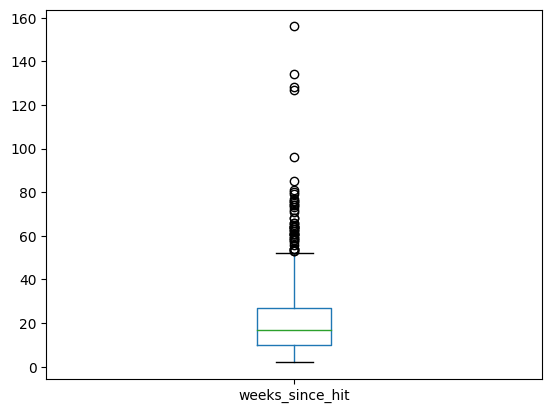

In [115]:
mask_burn = (df_sub['week_dt_at_burnout'] == df_sub['week_dt'])
cols=['weeks_since_hit']
df_sub.loc[mask_burn, cols].plot(kind='box')

In [46]:
df_sub.loc[mask_burn, cols].describe()

,weeks_since_hit
count,778.000000
mean,21.399743
std,17.364985
min,2.000000
25%,10.000000
50%,17.000000
75%,27.000000
max,156.000000


In [51]:
np.quantile(df_sub.loc[mask_burn, cols], 0.95)

58.0

In [53]:
df_sub.loc[mask_burn, ['spins_to_burnout_from_hit']].describe()

,spins_to_burnout_from_hit
count,778.000000
mean,1026.242931
std,696.100178
min,8.000000
25%,471.500000
50%,944.000000
75%,1428.750000
max,3652.000000


In [75]:
quantile_levels = [0.25, 0.5, 0.75, 0.95]
[round((np.quantile(df_sub.loc[mask_burn, ['spins_to_burnout_from_hit']], lvl)/50))*50 for lvl in quantile_levels]

[450, 950, 1450, 2300]

In [117]:
pd.cut(df_sub.loc[mask_burn, 'spins_to_burnout_from_hit'], bins=[0, 450, 950, 1450, 2300, np.ceil(
    np.max(df_sub.loc[mask_burn, 'spins_to_burnout_from_hit']) / 50) * 50]).astype(str).str.replace(', ', '-').str.strip('()[]')

159312       0.0-450.0
279513       0.0-450.0
288201       0.0-450.0
329700       0.0-450.0
329851     450.0-950.0
              ...     
645750    950.0-1450.0
645833    950.0-1450.0
645981    950.0-1450.0
646207     450.0-950.0
646291    950.0-1450.0
Name: spins_to_burnout_from_hit, Length: 778, dtype: object

In [71]:
df_sub.loc[mask_burn, ['spins_to_burnout_from_hit']]

,spins_to_burnout_from_hit
159312,282.0
279513,123.0
288201,79.0
329700,162.0
329851,592.0
...,...
645750,1142.0
645833,1150.0
645981,1011.0
646207,740.0


In [15]:
id_cols = ['mediabase_id', 'call_letters']
mask = (df_sub['weeks_since_hit'] == 2) & (df_sub['censoring_flg'] == False)
mask_org = (df_sub['weeks_since_hit'] == 1) & (df_sub['censoring_flg'] == False)
df_inv = df_sub.loc[mask_org].join(df_sub.loc[mask].set_index(id_cols), on=id_cols, how='left', rsuffix='_r')

In [22]:
mask_inv = pd.isna(df_inv['week_dt_r'])
df_raw_features.join(df_inv.loc[mask_inv, id_cols + ['week_dt']].set_index(id_cols), on=id_cols, how='inner', rsuffix='_r')

,mediabase_id,song_id,call_letters,market_name,artist_id,format_code,song_release_date,first_callout_date,last_callout_date,first_spin_date,...,market_spins_propn_ftq_to_hit_min,market_spins_propn_ftq_to_hit_max,market_spins_propn_ftq_to_hit_mean,market_spins_propn_ftq_to_hit_std,artist_spins_propn_ftq_to_hit_min,artist_spins_propn_ftq_to_hit_max,artist_spins_propn_ftq_to_hit_mean,artist_spins_propn_ftq_to_hit_std,censoring_flg,week_dt_r
641054,2738262,1932303516,WIHT-FM,"Washington, DC",739047068,H1,2021-09-01,2022-10-17,2023-04-10,2022-05-29,...,0.117647,1.000000,0.425395,0.309865,0.75,1.0,0.964286,0.094491,False,2023-03-26
641055,2738262,1932303516,WIHT-FM,"Washington, DC",739047068,H1,2021-09-01,2022-10-17,2023-04-10,2022-05-29,...,0.117647,1.000000,0.425395,0.309865,0.75,1.0,0.964286,0.094491,False,2023-03-26
641056,2738262,1932303516,WIHT-FM,"Washington, DC",739047068,H1,2021-09-01,2022-10-17,2023-04-10,2022-05-29,...,0.117647,1.000000,0.425395,0.309865,0.75,1.0,0.964286,0.094491,False,2023-03-26
641057,2738262,1932303516,WIHT-FM,"Washington, DC",739047068,H1,2021-09-01,2022-10-17,2023-04-10,2022-05-29,...,0.117647,1.000000,0.425395,0.309865,0.75,1.0,0.964286,0.094491,False,2023-03-26
641058,2738262,1932303516,WIHT-FM,"Washington, DC",739047068,H1,2021-09-01,2022-10-17,2023-04-10,2022-05-29,...,0.117647,1.000000,0.425395,0.309865,0.75,1.0,0.964286,0.094491,False,2023-03-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641270,2738262,1932303516,WXXL-FM,Orlando,739047068,H1,2021-09-01,2022-10-17,2023-04-10,2022-05-22,...,0.066667,0.794118,0.401042,0.238117,1.00,1.0,1.000000,0.000000,False,2023-03-26
641271,2738262,1932303516,WXXL-FM,Orlando,739047068,H1,2021-09-01,2022-10-17,2023-04-10,2022-05-22,...,0.066667,0.794118,0.401042,0.238117,1.00,1.0,1.000000,0.000000,False,2023-03-26
641272,2738262,1932303516,WXXL-FM,Orlando,739047068,H1,2021-09-01,2022-10-17,2023-04-10,2022-05-22,...,0.066667,0.794118,0.401042,0.238117,1.00,1.0,1.000000,0.000000,False,2023-03-26
641273,2738262,1932303516,WXXL-FM,Orlando,739047068,H1,2021-09-01,2022-10-17,2023-04-10,2022-05-22,...,0.066667,0.794118,0.401042,0.238117,1.00,1.0,1.000000,0.000000,False,2023-03-26


<AxesSubplot:>

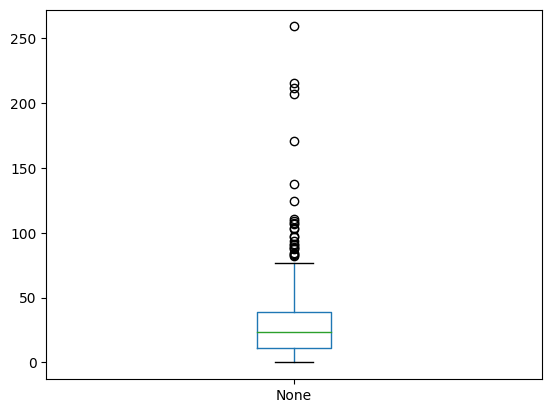

In [26]:
((df_raw_features['first_spin_date'] - df_raw_features['song_release_date'])/(np.timedelta64(1, 'W'))).drop_duplicates().plot(kind='box')

#### prep training and test data

In [8]:
# define different types of feature columns
feature_cols = [col for col in df_raw_features.columns if 'wk' in col]
feature_cols = list(set(feature_cols) - set([col for col in feature_cols if '1wk' in col]))
pop_cols = [col for col in feature_cols if 'pop' in col or 'ddl' in col or 'fav' in col]
spins_cols = [col for col in feature_cols if 'spins' in col]
propn_cols = [col for col in feature_cols if 'propn' in col]
streams_cols = [col for col in feature_cols if 'unv' in col]

##### small detour

In [6]:
df_hits_tracker['hit_tag_year'] = df_hits_tracker['hit_tag_date'].dt.year

In [94]:
df_hits_tracker

,mediabase_id,call_letters,song_release_date,song_release_year,ftq_date,hit_tag_date,ddl_over_thresh_dt_first,ddl_over_thresh_dt_second,weeks_bw_ftq_first_spins,weeks_bw_top_quintiles,cuml_song_station_spins_non_on_at_ftq,cuml_song_station_spins_non_on_at_hit,cuml_song_station_spins_non_on_at_pre_burnout,cuml_song_station_spins_non_on_at_burnout,spins_to_hit_from_ftq,spins_to_burnout_from_hit,censoring_flg,hit_tag_year
0,1086587,KHTS-FM,2022-06-01,2022.0,2022-07-10,2022-10-23,2022-11-06,2022-11-20,4.0,15.0,114.0,989.0,1086.0,1182.0,875.0,193.0,True,2022
42,1086587,KIIS-FM,2022-06-01,2022.0,2022-07-03,2022-07-17,2022-08-21,None,3.0,2.0,46.0,168.0,612.0,NaN,122.0,NaN,False,2022
84,1086587,KYLD-FM,2022-06-01,2022.0,2022-07-03,2022-08-14,2022-09-11,None,4.0,6.0,133.0,445.0,602.0,NaN,312.0,NaN,False,2022
127,1086587,KZZP-FM,2022-06-01,2022.0,2022-07-17,2022-08-21,2022-09-18,None,5.0,5.0,187.0,592.0,748.0,NaN,405.0,NaN,False,2022
169,1086587,WHTZ-FM,2022-06-01,2022.0,2022-06-19,2022-07-31,2022-09-04,2022-09-18,1.0,6.0,16.0,283.0,616.0,664.0,267.0,381.0,True,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655418,2865765,WKST-FM,2022-12-01,2022.0,2023-02-26,2023-03-12,None,None,8.0,2.0,327.0,520.0,NaN,NaN,193.0,NaN,False,2023
655431,2865765,WWPW-FM,2022-12-01,2022.0,2023-02-19,2023-03-05,None,None,7.0,2.0,489.0,691.0,NaN,NaN,202.0,NaN,False,2023
655444,2865765,WXKS-FM,2022-12-01,2022.0,2023-01-15,2023-02-05,None,None,2.0,3.0,51.0,240.0,NaN,NaN,189.0,NaN,False,2023
655457,2865765,WXXL-FM,2022-12-01,2022.0,2023-02-19,2023-03-19,None,None,7.0,4.0,235.0,571.0,NaN,NaN,336.0,NaN,False,2023


In [97]:
pd.DataFrame(
    df_hits_tracker.groupby(['hit_tag_year', 'censoring_flg'])['mediabase_id'].count().reset_index()).pivot_table(
    index=['hit_tag_year'], columns=['censoring_flg'], values=['mediabase_id'])

mediabase_id      
censoring_flg        False True 
hit_tag_year                    
2017                    53   456
2018                    88   571
2019                   107   492
2020                   121   366
2021                   200   385
2022                   176   208
2023                   125     7

In [7]:
import seaborn as sns
sns.set_theme()

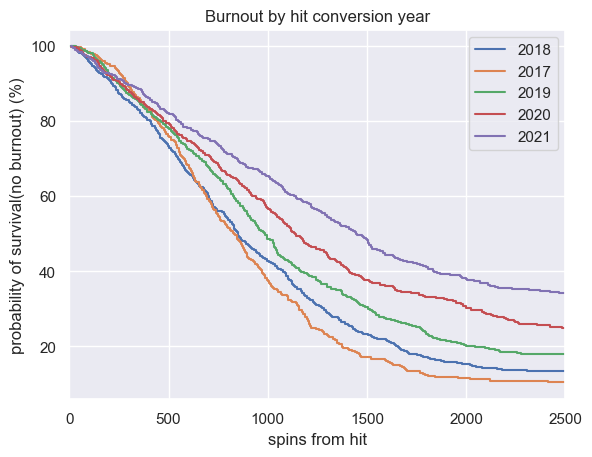

In [12]:
from sksurv.nonparametric import kaplan_meier_estimator
import matplotlib.pyplot as plt

for treatment_type in pd.unique(df_hits_tracker['hit_tag_year']):
    if treatment_type < 2022:
        mask_treat = df_hits_tracker["hit_tag_year"] == treatment_type
        time_treatment, survival_prob_treatment = kaplan_meier_estimator(
            df_hits_tracker["censoring_flg"][mask_treat],
            df_hits_tracker["spins_to_burnout_from_hit"][mask_treat].fillna(2500))

        plt.step(time_treatment, 100 * survival_prob_treatment, where="post",
                 label="%s" % int(treatment_type))

plt.xlim([0, 2500])
plt.ylabel("probability of survival(no burnout) (%)")
plt.xlabel("spins from hit")
plt.legend(loc="best")
plt.title('Burnout by hit conversion year')
#plt.tight_layout()
plt.savefig('burnout_by_hit_year.jpeg', format='jpeg', dpi=300)

In [102]:
from sksurv.compare import compare_survival

mask = (df_hits_tracker['hit_tag_year'] >= 2020) & (df_hits_tracker['hit_tag_year'] <= 2021)
df_sub = df_hits_tracker.loc[mask]
df_sub['spins_to_burnout_from_hit'] = df_sub['spins_to_burnout_from_hit'].fillna(2500)
y_cols = ['censoring_flg', 'spins_to_burnout_from_hit']
chisq, pvalue, stats, covariance = compare_survival(df_sub[y_cols].to_records(index=False),
                                                    group_indicator=df_sub['hit_tag_year'],
                                                    return_stats=True)

/Users/girishhanumantha/Documents/GitHub/adds-early-burnout-warning-model/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [103]:
pvalue

0.0005715849387866567

In [100]:
stats['burn_perc'] = stats['observed'] / stats['counts']

In [101]:
stats

,counts,observed,expected,statistic,burn_perc
group,,,,,
2017,509,456,330.323059,125.676941,0.895874
2018,659,571,456.309774,114.690226,0.866464
2019,599,492,471.083814,20.916186,0.821369
2020,487,366,430.685674,-64.685674,0.751540
2021,585,385,581.597680,-196.597680,0.658120


In [10]:
df_hits_tracker['hit_spins_bucket_curr'] = pd.cut(df_hits_tracker['cuml_song_station_spins_non_on_at_hit'], bins=[0, 200, 500, round(np.max(df_hits_tracker['cuml_song_station_spins_non_on_at_hit'])/100)*100], labels=['early', 'mid', 'late'])

In [11]:
df_hits_tracker

,mediabase_id,call_letters,song_release_date,song_release_year,ftq_date,hit_tag_date,ddl_over_thresh_dt_first,ddl_over_thresh_dt_second,weeks_bw_ftq_first_spins,weeks_bw_top_quintiles,cuml_song_station_spins_non_on_at_ftq,cuml_song_station_spins_non_on_at_hit,cuml_song_station_spins_non_on_at_pre_burnout,cuml_song_station_spins_non_on_at_burnout,spins_to_hit_from_ftq,spins_to_burnout_from_hit,censoring_flg,hit_tag_year,hit_spins_bucket_curr
0,1086587,KHTS-FM,2022-06-01,2022.0,2022-07-10,2022-10-23,2022-11-06,2022-11-20,4.0,15.0,114.0,989.0,1086.0,1182.0,875.0,193.0,True,2022,late
42,1086587,KIIS-FM,2022-06-01,2022.0,2022-07-03,2022-07-17,2022-08-21,None,3.0,2.0,46.0,168.0,612.0,NaN,122.0,NaN,False,2022,early
84,1086587,KYLD-FM,2022-06-01,2022.0,2022-07-03,2022-08-14,2022-09-11,None,4.0,6.0,133.0,445.0,602.0,NaN,312.0,NaN,False,2022,mid
127,1086587,KZZP-FM,2022-06-01,2022.0,2022-07-17,2022-08-21,2022-09-18,None,5.0,5.0,187.0,592.0,748.0,NaN,405.0,NaN,False,2022,late
169,1086587,WHTZ-FM,2022-06-01,2022.0,2022-06-19,2022-07-31,2022-09-04,2022-09-18,1.0,6.0,16.0,283.0,616.0,664.0,267.0,381.0,True,2022,mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655418,2865765,WKST-FM,2022-12-01,2022.0,2023-02-26,2023-03-12,None,None,8.0,2.0,327.0,520.0,NaN,NaN,193.0,NaN,False,2023,late
655431,2865765,WWPW-FM,2022-12-01,2022.0,2023-02-19,2023-03-05,None,None,7.0,2.0,489.0,691.0,NaN,NaN,202.0,NaN,False,2023,late
655444,2865765,WXKS-FM,2022-12-01,2022.0,2023-01-15,2023-02-05,None,None,2.0,3.0,51.0,240.0,NaN,NaN,189.0,NaN,False,2023,mid
655457,2865765,WXXL-FM,2022-12-01,2022.0,2023-02-19,2023-03-19,None,None,7.0,4.0,235.0,571.0,NaN,NaN,336.0,NaN,False,2023,late


#### quick detour to create spins to burn from hit bucket

In [9]:
df_raw_features['spins_to_burnout_from_hit_bucket'] = pd.cut(df_raw_features['spins_to_burnout_from_hit'].fillna(3001), bins=[0, 800, 1300, 1900, 3000, np.ceil(
    np.max(df_raw_features['spins_to_burnout_from_hit']) / 50) * 50]).astype(str).str.replace(', ', '-').str.strip('()[]')

##### train-test split and setup

In [73]:
# training data
mask_train = (df_raw_features['weeks_since_hit'] > 0) & (df_raw_features['hit_tag_year'] >= 2020) & (
        df_raw_features['hit_tag_year'] <= 2021) & (
                         df_raw_features['week_dt'] <= df_raw_features['week_dt_at_burnout'].fillna(
                     df_raw_features['week_dt']))
#target_cols = ['spins_to_burnout_from_hit_bucket']
target_cols = ['censoring_flg']
id_cols = ['mediabase_id', 'call_letters', 'weeks_since_hit']
cat_cols = ['market_name']
df_train_prep = df_raw_features.loc[mask_train, id_cols + target_cols + feature_cols + cat_cols]
df_train_prep.set_index(id_cols, inplace=True)

In [105]:
df_censoring_by_wk = df_train_prep.groupby(['weeks_since_hit', 'censoring_flg'])['market_name'].count().reset_index().pivot_table(index=['weeks_since_hit'], columns=['censoring_flg'], values=['market_name']).reset_index()

In [106]:
df_censoring_by_wk

weeks_since_hit market_name       
censoring_flg                       False   True
0                         1.0       321.0  751.0
1                         2.0       321.0  751.0
2                         3.0       321.0  741.0
3                         4.0       321.0  736.0
4                         5.0       321.0  711.0
..                        ...         ...    ...
163                     164.0        13.0    NaN
164                     165.0        12.0    NaN
165                     166.0         9.0    NaN
166                     167.0         6.0    NaN
167                     168.0         6.0    NaN

[168 rows x 3 columns]

In [110]:
df_censoring_by_wk.columns=['weeks_since_hit', 'censoring_flg_False', 'censoring_flg_True']

In [111]:
df_censoring_by_wk['censoring_percent'] = df_censoring_by_wk['censoring_flg_False'] / (
            df_censoring_by_wk['censoring_flg_True'] + df_censoring_by_wk['censoring_flg_False'])

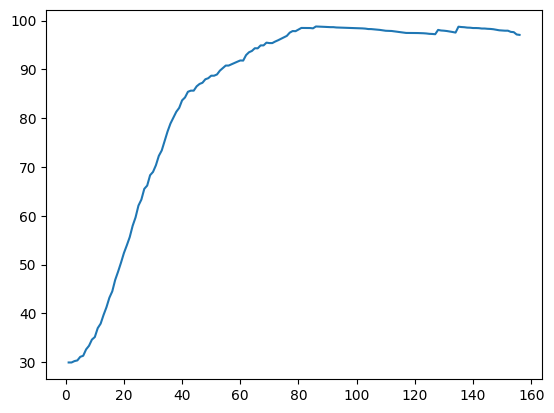

In [114]:
import matplotlib.pyplot as plt
plt.plot(df_censoring_by_wk['weeks_since_hit'], df_censoring_by_wk['censoring_percent']*100)

In [34]:
df_train_prep

censoring_flg  \
mediabase_id call_letters weeks_since_hit                  
2305938      KZHT-FM      1.0                       True   
                          2.0                       True   
                          3.0                       True   
                          4.0                       True   
                          5.0                       True   
...                                                  ...   
2750191      WWPW-FM      65.0                     False   
                          66.0                     False   
                          67.0                     False   
                          68.0                     False   
                          69.0                     False   

                                           song_market_spins_total_prior_26wk_min  \
mediabase_id call_letters weeks_since_hit                                           
2305938      KZHT-FM      1.0                                                 2.0   
                          2.0                                                 2.0   
                          3.0                                                 2.0   
                          4.0                                                 2.0   
                          5.0                                                 2.0   
...                                                                           ...   
2750191      WWPW-FM      65.0                                               16.0   
                          66.0                                               16.0   
                          67.0                                               16.0   
                          68.0                                               16.0   
                          69.0                                               16.0   

                                           artist_format_fav_prior_8wk_mean  \
mediabase_id call_letters weeks_since_hit                                     
2305938      KZHT-FM      1.0                                     22.750000   
                          2.0                                     22.875000   
                          3.0                                     23.125000   
                          4.0                                     23.000000   
                          5.0                                     22.250000   
...                                                                     ...   
2750191      WWPW-FM      65.0                                    29.500000   
                          66.0                                    29.500000   
                          67.0                                    27.666667   
                          68.0                                    25.666667   
                          69.0                                    24.333333   

                                           artist_format_pop_prior_8wk_max  \
mediabase_id call_letters weeks_since_hit                                    
2305938      KZHT-FM      1.0                                         84.0   
                          2.0                                         84.0   
                          3.0                                         84.0   
                          4.0                                         84.0   
                          5.0                                         82.0   
...                                                                    ...   
2750191      WWPW-FM      65.0                                        91.0   
                          66.0                                        91.0   
                          67.0                                        91.0   
                          68.0                                        91.0   
                          69.0                                        84.0   

                                           song_format_ddl_prior_13wk_max  \
mediabase_id call_letters weeks_sinc

In [195]:
[round((np.nanquantile(df_raw_features.loc[mask_train ,'spins_to_burnout_from_hit'], lvl)/100))*100 for lvl in quantile_levels]

[800, 1300, 1900, 3000]

In [141]:
df_train_prep.groupby(['weeks_since_hit'])['spins_to_burnout_from_hit_bucket'].count()

weeks_since_hit
1.0      1072
2.0      1072
3.0      1062
4.0      1057
5.0      1032
         ... 
164.0      13
165.0      12
166.0       9
167.0       6
168.0       6
Name: spins_to_burnout_from_hit_bucket, Length: 168, dtype: int64

In [83]:
# test data
mask_test= (df_raw_features['weeks_since_hit'] > 0) & (df_raw_features['hit_tag_year'] > 2021) & (
        df_raw_features['hit_tag_year'] <= 2022)  & (df_raw_features['hit_tag_date'] <= pd.to_datetime('2022-03-31'))
df_test_prep = df_raw_features.loc[mask_test, id_cols + target_cols + feature_cols + cat_cols]
df_test_prep.set_index(id_cols, inplace=True)

In [40]:
df_test_prep

censoring_flg  \
mediabase_id call_letters weeks_since_hit                  
2391754      WRVW-FM      1.0                      False   
                          2.0                      False   
                          3.0                      False   
                          4.0                      False   
                          5.0                      False   
...                                                  ...   
2760708      WKFS-FM      50.0                      True   
                          51.0                      True   
                          52.0                      True   
                          53.0                      True   
                          54.0                      True   

                                           song_market_spins_total_prior_26wk_min  \
mediabase_id call_letters weeks_since_hit                                           
2391754      WRVW-FM      1.0                                                 0.0   
                          2.0                                                 0.0   
                          3.0                                                 0.0   
                          4.0                                                 0.0   
                          5.0                                                 0.0   
...                                                                           ...   
2760708      WKFS-FM      50.0                                                1.0   
                          51.0                                                1.0   
                          52.0                                                1.0   
                          53.0                                                1.0   
                          54.0                                                1.0   

                                           artist_format_fav_prior_8wk_mean  \
mediabase_id call_letters weeks_since_hit                                     
2391754      WRVW-FM      1.0                                     24.000000   
                          2.0                                     23.500000   
                          3.0                                     24.125000   
                          4.0                                     24.000000   
                          5.0                                     24.375000   
...                                                                     ...   
2760708      WKFS-FM      50.0                                    24.000000   
                          51.0                                    21.666667   
                          52.0                                    21.666667   
                          53.0                                    22.250000   
                          54.0                                    22.200000   

                                           artist_format_pop_prior_8wk_max  \
mediabase_id call_letters weeks_since_hit                                    
2391754      WRVW-FM      1.0                                         80.0   
                          2.0                                         80.0   
                          3.0                                         83.0   
                          4.0                                         83.0   
                          5.0                                         83.0   
...                                                                    ...   
2760708      WKFS-FM      50.0                                        70.0   
                          51.0                                        70.0   
                          52.0                                        70.0   
                          53.0                                        70.0   
                          54.0                                        70.0   

                                           song_format_ddl_prior_13wk_max  \
mediabase_id call_letters weeks_sinc

#### train a random-forest model

In [118]:
week_start = 3
week_end = 53

weeks_range = list(range(week_start, week_end))
weeks_range

[3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52]

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
split_number=5
cross_val = StratifiedKFold(n_splits=split_number)

param_grid = {
 'max_depth': [2, 4, 6, 8, 10],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [50, 100, 150, 200],
'class_weight': ['balanced', None]
}

week_start = 3
week_end = 52

weeks_range = list(range(week_start, week_end + 1))
best_estimators = {}
best_scores = {}

for wk in weeks_range:
    rf = RandomForestClassifier(random_state=100)
    X_train = df_train_prep[df_train_prep.index.get_level_values(2) == wk][feature_cols + cat_cols]
    X_train = pd.get_dummies(X_train, columns=['market_name'])
    y_train = df_train_prep[df_train_prep.index.get_level_values(2) == wk][target_cols]

    rf_model = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, cv=cross_val, scoring= 'f1_micro', verbose=1, n_iter=50, n_jobs=-1)
    rf_model.fit(X_train, np.ravel(y_train))
    best_estimators[wk] = rf_model.best_estimator_
    best_scores[wk] = rf_model.best_score_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   21.0s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   20.2s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   23.3s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   19.7s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   18.3s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   17.3s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   20.3s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   17.3s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   18.7s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   19.3s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   18.3s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   16.2s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   15.1s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   17.0s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   15.6s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   14.4s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   15.7s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   17.0s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   17.4s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   16.9s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   16.6s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   16.1s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   15.9s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   13.7s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   14.1s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   13.4s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   13.0s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   14.8s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   12.1s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   11.7s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   14.0s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   12.4s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   11.9s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   12.6s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   11.7s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   11.8s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   10.5s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   10.1s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   11.5s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   10.1s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   10.1s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    9.7s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   10.5s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   10.5s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   10.4s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   10.6s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    9.5s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   10.2s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   10.6s finished


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   11.1s finished


In [123]:
best_estimators

{3: RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                        random_state=100),
 4: RandomForestClassifier(class_weight='balanced', max_depth=10,
                        max_features='sqrt', n_estimators=50, random_state=100),
 5: RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=200,
                        random_state=100),
 6: RandomForestClassifier(class_weight='balanced', max_depth=8,
                        max_features='sqrt', n_estimators=150, random_state=100),
 7: RandomForestClassifier(class_weight='balanced', max_depth=8, n_estimators=200,
                        random_state=100),
 8: RandomForestClassifier(max_depth=2, random_state=100),
 9: RandomForestClassifier(max_depth=6, max_features='sqrt', random_state=100),
 10: RandomForestClassifier(max_depth=6, n_estimators=50, random_state=100),
 11: RandomForestClassifier(class_weight='balanced', max_depth=10,
                        max_features='sqrt',

In [84]:
X_test = df_test_prep[df_test_prep.index.get_level_values(2) == 10][feature_cols + cat_cols]
X_test = pd.get_dummies(X_test, columns=['market_name'])
y_test = df_test_prep[df_test_prep.index.get_level_values(2) == 10][target_cols]

In [130]:
import pickle
with open('ebw_best_estimators_classfn_trial_h1.pkl', 'wb') as file:
    pickle.dump(best_estimators, file)
with open('ebw_best_scores_classfn_trial_h1.pkl', 'wb') as file:
    pickle.dump(best_scores, file)

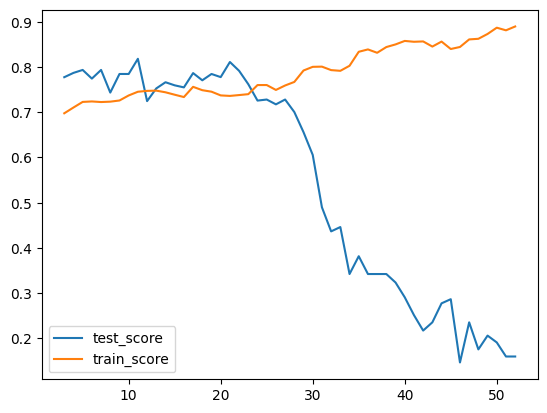

In [137]:
from sklearn.metrics import f1_score
plt.plot(best_estimators.keys(), [f1_score(y_test, best_estimators[key].predict(X_test) , average='weighted') for key in best_estimators], label='test_score')
plt.plot(best_scores.keys(), best_scores.values(), label='train_score')
plt.legend()